# Homework 1

In [48]:
# import libraries
import pyarrow

import pandas as pd
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, root_mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'2.2.3'

In [3]:
# load data
df1 = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df2 = pd.read_parquet('./data/green_tripdata_2021-02.parquet')

In [25]:
def describe(df):
    df.head(2)
    df.duration.describe(percentiles= [0.95, 0.98, 0.99])

    sns.boxplot(df.duration)

def transformation(df):
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']

    for col in categorical:
        df[col] = df[col].astype(str)

    df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']

    return df

In [26]:
df1 = transformation(df1)
df2 = transformation(df2)

In [27]:
numerical = ['trip_distance']
categorical = ['PULocationID', 'DOLocationID']

In [28]:
#######

In [29]:
train_dicts = df1[categorical+numerical].to_dict(orient='records')

In [30]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [31]:
dv.feature_names_[:5]

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102']

In [32]:
#######

In [33]:
target = 'duration'
y = df1[target].values

In [34]:
y

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ], shape=(73908,))

In [35]:
######

In [36]:
lr = LinearRegression()
lr.fit(X_train, y)

LinearRegression()

<Axes: ylabel='Density'>

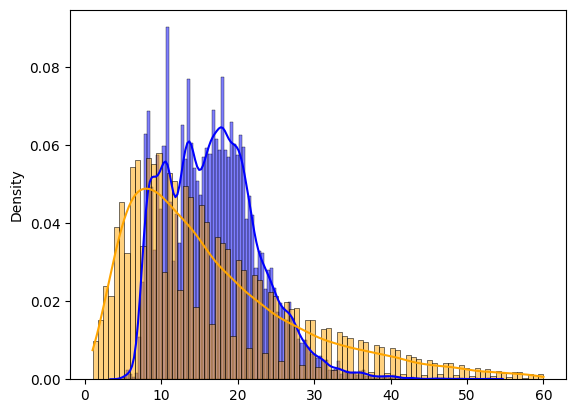

In [37]:
y_pred = lr.predict(X_train)
sns.histplot(y_pred, label='prediction', kde=True, color='blue', stat='density')
sns.histplot(y, label='actual', kde=True, color='orange', stat='density')

In [38]:
print(np.sqrt(mean_squared_error(y, y_pred)))

9.838799799829626


In [39]:
######

In [40]:
lasso = Lasso()
lasso.fit(X_train, y)
y_pred_lasso = lasso.predict(X_train)

In [41]:
y_pred_lasso

array([16.84934773, 16.84946739, 16.84935639, ..., 16.84946503,
       16.85040816, 16.84941071], shape=(73908,))

In [42]:
######

In [43]:
len(df1), len(df2)

(73908, 61921)

In [44]:
df_train = df1.copy()
df_val = df2.copy()

In [45]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [46]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.758715208009878

In [51]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

FileNotFoundError: [Errno 2] No such file or directory: 'models/lin_reg.bin'